https://chat.openai.com/share/70f87008-d452-484b-b8d2-8d4ba2b95891

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
columns = ["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]
X = df.copy()[columns]

churners = X.loc[df[df["Churn Label"] == "Yes"].index]
non_churners = X.loc[df[df["Churn Label"] == "No"].index]

### Churners Segmentation

In [41]:
scaler = StandardScaler()
churners_scaled = scaler.fit_transform(churners)

k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(churners_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [42]:
churners["Cluster"] = kmeans.labels_

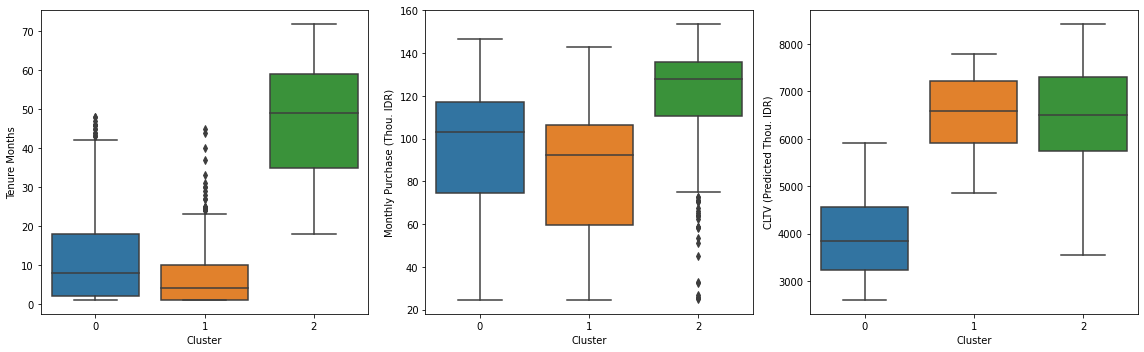

In [48]:
plt.figure(figsize=(16, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=churners, x='Cluster', y=churners.columns[i])

plt.tight_layout()
plt.show()

1. Segment Name: "The Swift Attrition"

Characteristics:
- Customers in this cluster have relatively short monthly tenures, with an average of around 12 months.
- Despite their short tenures, they have relatively high monthly expenditures.
- However, their CLTV is much lower compared to customers in other clusters.

Marketing Strategy:
- Focus on customer retention by highlighting the long-term benefits of telco services.
- Customer Education: Provide tutorial content to educate customers on maximizing their service usage and the benefits they may have missed.
- Loyalty Discounts: Offer incentives for them to extend their subscriptions, such as loyalty discounts.
- Community Programs: Engage short-tenure customers to share their experiences with telco services and encourage them to become part of a larger community.

2. Segment Name: "The Moderate Churners"

Characteristics:
- Customers in this cluster have moderate monthly tenures (average of around 6 months).
- Their monthly expenditures are relatively high.
- Despite having a potentially high CLTV, they still tend to churn for various reasons.

Marketing Strategy:
- Focus on customer retention by offering exclusive benefits and a premium experience.
- Loyalty Enhancement: Provide exclusive benefits and premium telco package offers to enhance their overall experience.
- Loyalty Programs: Offer loyalty programs, VIP access, and early access to new telco features to keep them loyal.
- Customer Community: Organize engagement activities to seek feedback on service improvements and show appreciation for their loyalty.

3. Segment Name: "The High-Value Churners"

Characteristics:
- Customers in this cluster have long monthly tenures (average of around 47 months).
- They have high monthly expenditures and a potentially high CLTV.
- However, they still tend to churn for various reasons.

Marketing Strategy:
- Focus on customer retention by emphasizing cost-effective telco service packages and the exploration of new subscription deals.
- Promotional Marketing: Offer telco packages with promotional discounts to encourage sign-ups within a specific time frame.
- Competitive Pricing Emphasis: Highlight competitive pricing between different telco subscriptions and the current one.
- Freebie Marketing: Offer them free trials of new telco service packages to encourage them to explore with confidence and include free gifts when they sign up for a subscription plan.

In [ ]:
for i in range(k):
    print("Cluster", i)
    print(churners[churners["Cluster"] == i][columns].describe())
    print()

### Non Churners Segmentation

In [47]:
scaler = StandardScaler()
non_churners_scaled = scaler.fit_transform(non_churners)

k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(non_churners_scaled)

non_churners["Cluster"] = kmeans.labels_

for i in range(k):
    print("Cluster", i)
    print(non_churners[non_churners["Cluster"] == i][columns].describe())
    print()

Cluster 0
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count     1895.00000                   1895.000000                 1895.000000
mean        57.57942                    115.742121                 6723.176728
std         14.62693                     21.904661                  936.718651
min          2.00000                     54.730000                 4018.300000
25%         51.00000                    100.717500                 5961.800000
50%         62.00000                    117.455000                 6715.800000
75%         70.00000                    134.875000                 7473.700000
max         72.00000                    154.375000                 8450.000000

Cluster 1
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count    1568.000000                   1568.000000                 1568.000000
mean       33.678571                     43.044343                 6653.360204
std        23.881648           

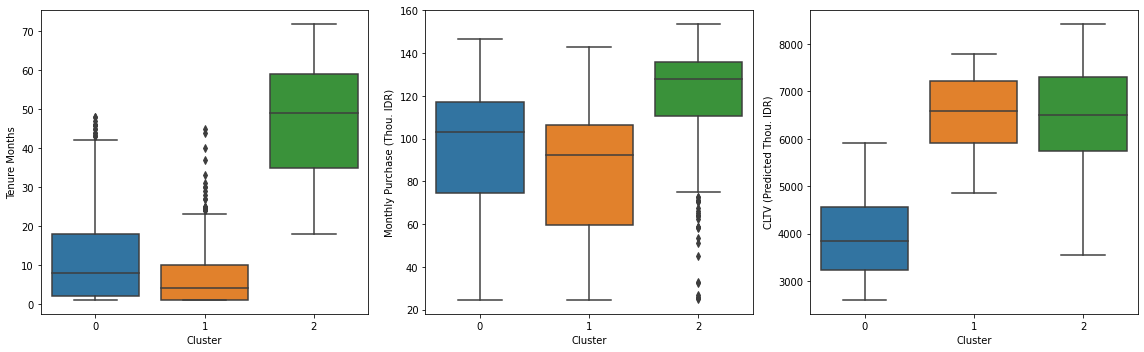

In [46]:
plt.figure(figsize=(16, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=churners, x='Cluster', y=churners.columns[i])

plt.tight_layout()
plt.show()

1. Segment Name: "The Loyal Premium Customers"

Characteristics:
- Customers in this cluster have a long average tenure of around 57.58 months.
- They have a relatively high average monthly purchase amount, approximately 115.74 Thousand IDR.
- The predicted CLTV for this group is quite high.

Marketing Strategy:
- Focus on maintaining and enhancing the premium experience for these loyal customers.
- Premium Enhancements: Offer premium features, exclusive content, and top-tier services to maintain their loyalty.
- Loyalty Rewards: Implement a loyalty program with rewards and special privileges for long-standing customers.
- Personalized Engagement: Engage with personalized content and offers to strengthen their loyalty.

2. Segment Name: "The Moderate Loyalty Segment"

Characteristics:
- Customers in this cluster have an average tenure of about 33.68 months.
- Their monthly purchase amounts are moderate, averaging around 43.04 Thousand IDR.
- The predicted CLTV for this group is relatively high.

Marketing Strategy:
- Enhance customer loyalty by offering tailored packages and promotions.
- Tailored Offers: Provide personalized package deals and promotions based on their preferences and history.
- Customer Feedback: Actively seek their feedback to improve the services and offerings.
- Loyalty Programs: Encourage participation in loyalty programs and reward them for their continued patronage.

3. Segment Name: "The Value-Seeking Customers"

Characteristics:
- Customers in this cluster have an average tenure of about 19 months.
- They have relatively lower monthly purchase amounts, averaging around 73.21 Thousand IDR.
- The predicted CLTV for this group is lower compared to the other segments.

Marketing Strategy:
- Focus on offering cost-effective and value-driven services.
- Value Packages: Promote affordable service packages and demonstrate their cost-effectiveness.
- Education on Savings: Educate customers about how they can get more value for their spending.
- Cost Savings: Emphasize the potential savings they can achieve by subscribing to specific packages.

In [68]:
segment_df = pd.read_excel("data/segmentation.xlsx")
segment_df.head()

,Model,Churn Label,Segment,Characteristics,Marketing
0,Value,Yes,The Swift Attrition,- Customers in this cluster have relatively sh...,- Focus on customer retention by highlighting ...
1,Value,Yes,The Moderate Churners,- Customers in this cluster have moderate mont...,- Focus on customer retention by offering excl...
2,Value,Yes,The High-Value Churners,- Customers in this cluster have long monthly ...,- Focus on customer retention by emphasizing c...
3,Value,No,The Loyal Premium Customers,- Customers in this cluster have a long averag...,- Focus on maintaining and enhancing the premi...
4,Value,No,The Moderate Loyalty Segment,- Customers in this cluster have an average te...,- Enhance customer loyalty by offering tailore...


In [67]:
filter = "Yes"
model = "Value-based Segmentation"

model = "Value" if "Value" in model else "Needs"

if filter == "Show All":
    temp = segment_df[segment_df["Model"] == model]
elif filter == "Churners":
    temp = segment_df[(segment_df["Model"] == model) & (segment_df["Churn Label"] == "Yes")]
else:
    temp = segment_df[(segment_df["Model"] == model) & (segment_df["Churn Label"] == "No")]

temp

,Model,Churn Label,Segment,Characteristics,Markteting
3,Value,No,The Loyal Premium Customers,- Customers in this cluster have a long averag...,- Focus on maintaining and enhancing the premi...
4,Value,No,The Moderate Loyalty Segment,- Customers in this cluster have an average te...,- Enhance customer loyalty by offering tailore...
5,Value,No,The Value-Seeking Customers,- Customers in this cluster have an average te...,- Focus on offering cost-effective and value-d...
